# Проект: Реализация и проверка алгоритма защиты персональных данных клиентов

**Оглавление**<a id='toc0_'></a>    
- 1. [Загрузка и изучение данных](#toc1_)    
  - 1.1. [Вывод по результатам раздела 1](#toc1_1_)    
- 2. [Обоснование выбранного решения умножения матриц](#toc2_)    
  - 2.1. [Вывод по результатам раздела 2](#toc2_1_)    
- 3. [Алгоритм преобразования данных](#toc3_)    
  - 3.1. [Вывод по разделу 3](#toc3_1_)    
- 4. [Проверка алгоритма](#toc4_)    
  - 4.1. [Проверка алгоритма с помощью матричных операций](#toc4_1_)    
  - 4.2. [Проверка алгоритма с помощью моделей](#toc4_2_)    
  - 4.3. [Вывод по разделу 4](#toc4_3_)    
- 5. [Общий вывод](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

**Задание:**

Требуется защитить данные клиентов страховой компании «Хоть потоп». Для этого необходимо разработать метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. При этом качество моделей машинного обучения не должно ухудшиться.

План работы:
1. Загрузка и изучение данных.
2. Обоснование выбранного решения умножения матриц.
3. Алгоритм преобразования данных.
4. Проверка алгоритма.
5. Общий вывод.

## 1. <a id='toc1_'></a>[Загрузка и изучение данных](#toc0_)

In [1]:
# загрузка библиотеки phik для построения матрицы корреляции с коэффициентом корреляции Phik
!pip install phik -U

     |████████████████████████████████| 679 kB 2.2 MB/s eta 0:00:01


In [2]:
# подключение библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from IPython.display import display
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# константы
PATH = 'D:/Education/Data_Science/Проекты курса DS/Проект_10/datasets/' # путь к файлам на ПК

In [3]:
# загрузка файла
try:
    data = pd.read_csv('/datasets/insurance.csv')
except FileNotFoundError:
    data = pd.read_csv(PATH+'insurance.csv')
# обзор данных
data.info()
display(pd.concat([data.head(5), data.sample(5), data.tail(5)]))
print('Количество полных дубликатов:', data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
3158,1,27.0,30000.0,3,0
539,1,31.0,42600.0,1,0
4143,1,40.0,34200.0,0,0
1425,0,32.0,46500.0,1,0
722,0,25.0,40200.0,1,0


Количество полных дубликатов: 153


- В данных обнаружены полные дубликаты строк. Такое может быть, у нас не полные данные по клиентам и имеющиеся наборы признаков у разных клиентов могут совпадать.
- Типы данных в столбцах "Возраст" и "Зарплата" по факту целочисленные. Изменим тип данных этих столбцов на соответствующий.

In [4]:
# изменение типа столбцов
data[['Возраст', 'Зарплата']] = data[['Возраст', 'Зарплата']].astype('int64')
print('\nТипы данных:')
print(data.dtypes)


Типы данных:
Пол                  int64
Возраст              int64
Зарплата             int64
Члены семьи          int64
Страховые выплаты    int64
dtype: object



Статистическая информация:


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.359400,1.194200,0.148000
std,0.500049,8.440807,9900.082063,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


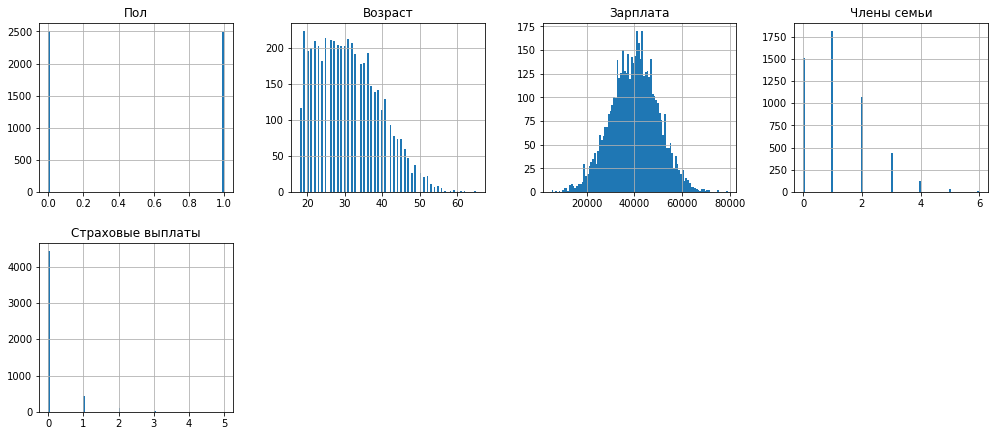

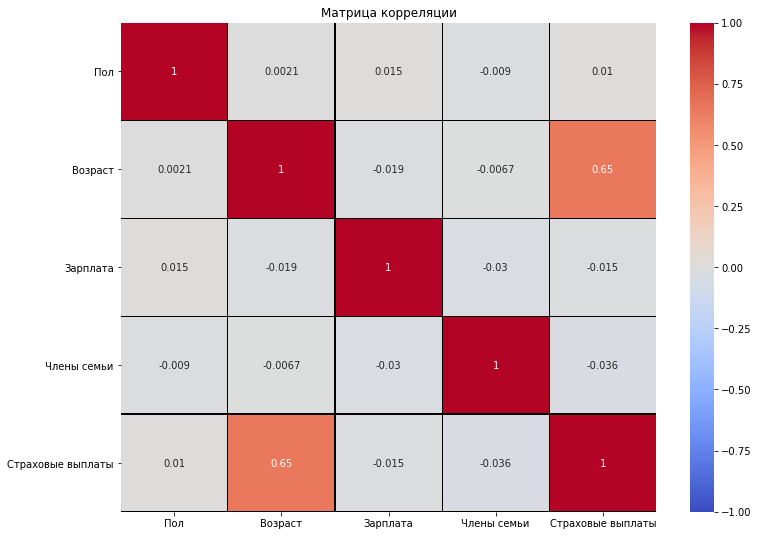

In [5]:
# отображение статистической информации
print('\nСтатистическая информация:')
display(data.describe())
data.hist(bins=100, figsize=(17,88), layout=(22,4))
plt.show()

# построение матрицы корреляции
plt.subplots(figsize=(12, 9))
sns.heatmap(data.corr(), vmin = -1, vmax = +1, cmap = 'coolwarm', annot=True, linewidths=.1, linecolor='black')
plt.yticks(rotation=0)
plt.title('Матрица корреляции')
plt.show()

В наборе признаков кроме количественных, имеются качественные признаки, а также признаки с распределением, отличным от нормального. В этой ситуации для исследования корреляции подойдет коэффициент Спирмена и коэффициент Phik. Построим матрицы корреляции с этими коэффициентами.

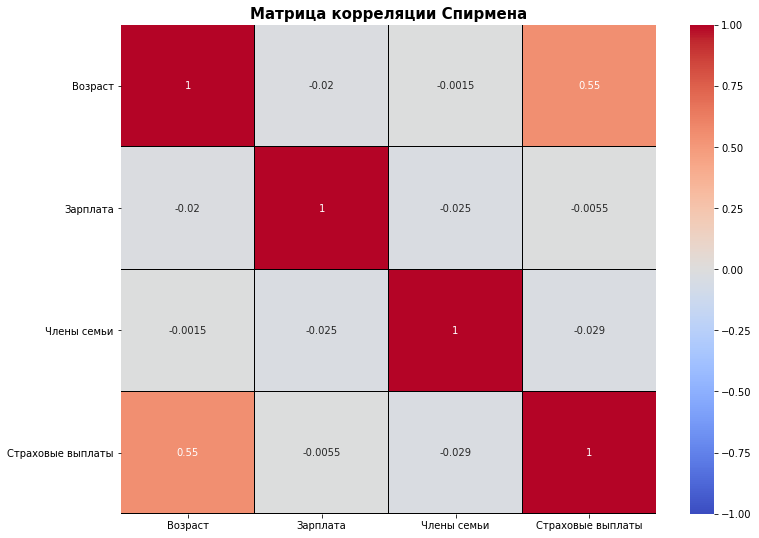

In [6]:
# построение матрицы с коэффициентом корреляции Спирмена (без признака "Пол")
plt.figure(figsize=(12, 9))
sns.heatmap(data.loc[:, data.columns != 'Пол'].corr(method = 'spearman'), 
            vmin = -1, vmax = +1, cmap = 'coolwarm', annot=True, linewidths=.1, linecolor='black')
plt.yticks(rotation=0)
plt.title('Матрица корреляции Спирмена', size=15, fontweight='bold')
plt.show()

Матрица с коэффициентами корреляции Phik


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.000000,0.000000,0.0,0.032181
Возраст,0.000000,1.000000,0.175125,0.0,0.884865
Зарплата,0.000000,0.175125,1.000000,0.0,0.000000
Члены семьи,0.000000,0.000000,0.000000,1.0,0.000000
Страховые выплаты,0.032181,0.884865,0.000000,0.0,1.000000


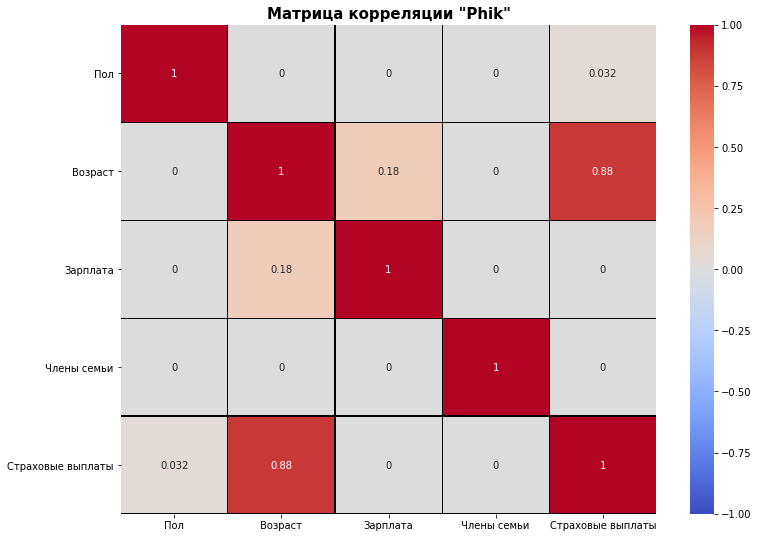

In [7]:
# построение матрицы с коэффициентом корреляции Phik
data_phik = data.phik_matrix(interval_cols=['Пол', 'Возраст', 'Члены семьи', 'Страховые выплаты'])
print('Матрица с коэффициентами корреляции Phik')
display(data_phik)

plt.figure(figsize=(12, 9))
sns.heatmap(data_phik, vmin = -1, vmax = +1, cmap = 'coolwarm', annot=True, linewidths=.1, linecolor='black')
plt.yticks(rotation=0)
plt.title('Матрица корреляции "Phik"', size=15, fontweight='bold')
plt.show()

Относительно высокая корреляция (0,88) наблюдается между возрастом и страховыми выплатами. Построим диаграмму рассеяния. 

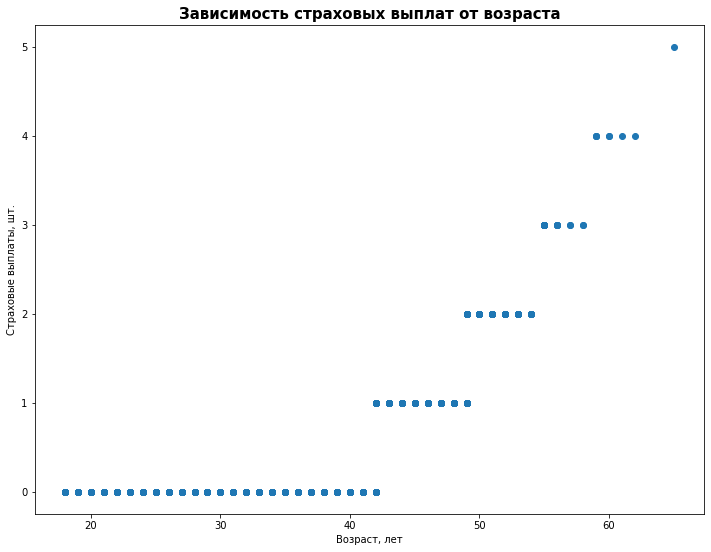

In [8]:
# построение диаграммы рассеяния (Возраст - Страховые выплаты)
plt.figure(figsize=(12, 9))
plt.scatter(data['Возраст'], data['Страховые выплаты'])
plt.xlabel('Возраст, лет')
plt.ylabel('Страховые выплаты, шт.')
plt.title('Зависимость страховых выплат от возраста', size=15, fontweight='bold')
plt.show()

Прямая зависимость действительно наблюдается, но в рамках данного проекта дополнительных действий для её устранения не требуется.

### 1.1. <a id='toc1_1_'></a>[Вывод по результатам раздела 1](#toc0_)

Размер загруженной выборки - 5000 записей.
- Пропусков в данных нет.
- Обнаружены дубликаты, которые с высокой вероятностью являются совпадающими по значениям данными для разных клиентов, поэтому удалять данные дубликаты нет необходимости.
- Типы данных в столбцах приведен к целочисленному для соответствия содержимому.
- Анализ гистограмм распределения показывает отсутствие сильных выбросов и аномальных значений.
- Корреляция между признаками ($X$) и признаками ($X$) отсутствует.
- Существует корреляция между признаком ($X$)  "Возраст" и целевым признаком ($y$) "Страховые выплаты". В зависимости от используемого коэффициента корреляции, значение составляет от 0,55 до 0,88. В случае наших данных, имеющих в своем составе категориальные данные и признаки с распределениями, не соответствующими нормальному, за основу возьмем коэффициент корреляции $\phi_k$ со значением 0,88. Значение высокое, но дополнительные мероприятия по снижению корреляции проводить не требуется.

## 2. <a id='toc2_'></a>[Обоснование выбранного решения умножения матриц](#toc0_)

В качестве решения поставленной задачи по защите персональных данных планируется использовать умножение матрицы признаков (персональных данных) на произвольную обратимую матрицу. Проанализируем и определим, изменится ли качество линейной регрессии, если матрицу признаков до отработки моделью умножить на обратимую матрицу.

Качество линейной регрессии можно определить по предсказаниям, которые дает модель. Поэтому сравним предсказания линейной регрессии для матрицы признаков и предсказания линейной регрессии для матрицы признаков, умноженной на обратимую матрицу.

Для выполнения сравнения проведем необходимые математические расчеты.

<ins>Условные обозначения:</ins>

- $X$ — матрица признаков (нулевой столбец состоит из единиц);
- $y$ — вектор целевого признака;
- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу);
- $P$ — обратимая матрица, на которую умножаются признаки;
- $X_2$ — матрица с измененными признаками (после умножения матрицы признаков $X$ на обратимую матрицу $P$);
- $E$ — единичная матрица (по главной диагонали расположены единицы, остальное заполнено нулями).

<ins>Используемые в расчетах свойства матричных операций:</ins>

$\begin{aligned}
&(A\cdot B)^T=B^T\cdot A^T \\
&(A\cdot B)^{-1}=B^{-1}\cdot A^{-1} \\
&A^{-1}\cdot A=A\cdot A^{-1}=E \\
&A\cdot E=E\cdot A=A \\
\end{aligned}$

<ins>Расчеты:</ins>

Задача обучения линейной регресии:

$\begin{aligned}
&w=\arg\min_w MSE(Xw, y)
\end{aligned}$

Формула обучения линейной регресии:

$\begin{aligned}
&w=(X^T\cdot X)^{-1}\cdot X^T\cdot y
\end{aligned}$

Предсказания линейной регрессии $a$ рассчитываются по формуле:

$\begin{aligned}
&a=X\cdot w \text{ ,}
\end{aligned}$

Предсказания линейной регрессии $a_2$ после умножения матрицы признаков $X$ на обратимую матрицу $P$ :

$\begin{aligned}
&a_2=X_2\cdot w_2\text{ , где:} \\
&\;\;\;\;X_2=X\cdot P \\
&\;\;\;\;w_2=(X_2^T\cdot X_2)^{-1}\cdot X_2^T\cdot y
\end{aligned}$

Подставим значения в формулу предсказаний линейной регрессии $a_2$ и выполним необходимые преобразования, используя свойства матричных операций:

$\begin{aligned}
&a_2=X_2\cdot w_2=X\cdot P\cdot \left((X\cdot P)^T\cdot (X\cdot P)\right)^{-1}\cdot (X\cdot P)^T\cdot y=\\
&=X\cdot P\cdot (X\cdot P)^{-1}\cdot \left((X\cdot P\right)^T)^{-1}\cdot (X\cdot P)^T\cdot y=\\
&=X\cdot P\cdot P^{-1}\cdot X^{-1}\cdot (P^T\cdot X^T)^{-1}\cdot P^T\cdot X^T\cdot y=\\
&=X\cdot E\cdot X^{-1}\cdot \left(X^T\right)^{-1}\cdot \left(P^T\right)^{-1}\cdot P^T\cdot X^T\cdot y=\\
&=X\cdot X^{-1}\cdot (X^T)^{-1}\cdot E\cdot X^T\cdot y=\\
&=X\cdot (X^T\cdot X)^{-1}\cdot X^T\cdot y=\\
&=X\cdot w
\end{aligned}$

В результате получили, что предсказания линейной регрессии для матрицы признаков и предсказания для матрицы признаков, умноженной на обратимую матрицу, равны.

$\begin{aligned}
&a_2=X_2\cdot w_2=X\cdot P\cdot \left((X\cdot P)^T\cdot X\cdot P\right)^{-1}\cdot (X\cdot P)^T\cdot y=\\
&=X\cdot P\cdot \left(P^T\cdot X^T \cdot X\cdot P\right)^{-1} \cdot P^T\cdot X^T\cdot y=\\
&=X\cdot P\cdot \left(P^T\cdot (X^T \cdot X)\cdot P\right)^{-1} \cdot P^T\cdot X^T\cdot y=\\
&=X\cdot P\cdot P^{-1}\cdot (X^T \cdot X)^{-1}\cdot (P^T)^{-1}\cdot P^T\cdot X^T\cdot y=\\
&=X\cdot E\cdot (X^T \cdot X)^{-1}\cdot E\cdot X^T\cdot y=\\
&=X\cdot (X^T\cdot X)^{-1}\cdot X^T\cdot y=\\
&=X\cdot w
\end{aligned}$

В результате расчетов получили, что предсказания линейной регрессии для матрицы признаков $X$ и предсказания линейной регрессии для матрицы признаков $X$, умноженной на обратимую матрицу $P$, равны.

Теперь рассмотрим, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

$\begin{aligned}
&a_2=X_2\cdot w_2=X\cdot w\\
&X_2\cdot w_2=X\cdot w\\
&X\cdot P\cdot w_2=X\cdot w\\
\end{aligned}$

Домножим обе части уравнения на $X^{-1}$ слева.

$\begin{aligned}
&X^{-1}\cdot X\cdot P\cdot w_2=X^{-1}\cdot X\cdot w\\
&E\cdot P\cdot w_2=E\cdot w\\
&P\cdot w_2=w\\
\end{aligned}$

Домножим обе части уравнения на $P^{-1}$ слева.

$\begin{aligned}
&P^{-1}\cdot P\cdot w_2=P^{-1}\cdot w\\
&E\cdot w_2=P^{-1}\cdot w\\
&w_2=P^{-1}\cdot w\\
\end{aligned}$

Таким образом, параметры линейной регрессии после преобразования равны произведению обратной матрицы для произвольной обратимой матрицы, на которую умножались признаки, и параметров исходной линейной регрессии.

### 2.1. <a id='toc2_1_'></a>[Вывод по результатам раздела 2](#toc0_)



1. При умножении признаков на обратимую матрицу, качество линейной регрессии не изменяется, так как предсказания линейной регрессии для матрицы признаков $X$ и предсказания линейной регрессии для матрицы признаков $X$, умноженной на обратимую матрицу $P$, равны.

2. Связь между параметрами линейной регрессии в исходной задаче и в преобразованной определяется формулой:  
$w_2=P^{-1}\cdot w$  
Параметры линейной регрессии после преобразования равны произведению обратной матрицы, на которую умножались признаки, на параметры исходной линейной регрессии.

## 3. <a id='toc3_'></a>[Алгоритм преобразования данных](#toc0_)

Определим следующий порядок действий по преобразованию данных:

1. Создание обратимой матрицы со случайными значениями и размерностью, равной количеству признаков.
2. Проверка созданной матрицы на обратимость путем расчета определителя (детерминаната) матрицы и сравнения его с нулем.
3. Преобразование признаков умножением на созданную обратимую матрицу.
4. Получение предсказаний линейной регрессии для преобразованных признаков, получение метрики R2.
5. Обучение линейной регрессии на исходных данных, получение метрики R2.
6. Сравнение получившихся метрик R2.

### 3.1. <a id='toc3_1_'></a>[Вывод по разделу 3](#toc0_)

Алгоритм преобразования исходных признаков путем их умножения на обратимую матрицу со случайными значениями не приводит к искажению предсказаний и изменению качества линейной регрессии, так как проведенные математические расчеты доказывают, что предсказания линейной регрессии для матрицы признаков $X$ равны предсказаниям линейной регрессии для матрицы признаков $X$, умноженной на произвольную обратимую матрицу $P$.

## 4. <a id='toc4_'></a>[Проверка алгоритма](#toc0_)

### 4.1. <a id='toc4_1_'></a>[Проверка алгоритма с помощью матричных операций](#toc0_)

Выполним алгоритм по шагам и проанализируем результат.

1. Создание обратимой матрицы со случайными значениями.

В выборке 4 признака, поэтому необходимо создать матрицу размерностью 5х5 (4 + 1) с учетом нулевого столбца из единиц в матрице признаков. Диапазон случайных значений выберем произвольно - положительные целые двузначные числа от 10 до 99.

In [9]:
matrix = np.random.randint(10, 99, (5, 5))
print(matrix)

[[82 11 97 34 64]
 [94 12 20 10 69]
 [78 83 69 84 13]
 [54 49 97 45 13]
 [20 62 16 29 16]]


In [10]:
# проверка на возможность создания обратной матрицы
np.linalg.inv(matrix)

array([[-0.02194995,  0.02063313,  0.0028458 ,  0.01876198, -0.01873688],
       [-0.01342334,  0.00711241, -0.01049573,  0.01641951,  0.01820802],
       [ 0.00271365, -0.00366228, -0.0083524 ,  0.01427062,  0.00013042],
       [ 0.02715833, -0.0215272 ,  0.02704329, -0.04125574, -0.00424963],
       [ 0.02751477, -0.01067167, -0.00354988, -0.02657269,  0.02293709]])

2. Преобразование признаков путем умножения на обратимую матрицу.

In [11]:
# создание выборки с признаками и выборки с целевым признаком
features = data.drop(columns='Страховые выплаты')
target = data['Страховые выплаты']

# умножение признаков на обратимую матрицу
features_with_one = np.concatenate((np.ones((features.shape[0], 1)), features), axis=1)
features_matrix = pd.DataFrame(features_with_one.dot(matrix))

print('Результат умножения признаков на обратимую матрицу:')
display(features_matrix.head())
features_matrix.info()

Результат умножения признаков на обратимую матрицу:


,0,1,2,3,4
0,2681794.0,2433888.0,4814162.0,2235517.0,645482.0
1,2055690.0,1865891.0,3689287.0,1713927.0,494678.0
2,1136344.0,1031418.0,2039098.0,947470.0,273441.0
3,2253560.0,2045178.0,4046478.0,1878356.0,542469.0
4,1411760.0,1281247.0,2533749.0,1176896.0,339797.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5000 non-null   float64
 1   1       5000 non-null   float64
 2   2       5000 non-null   float64
 3   3       5000 non-null   float64
 4   4       5000 non-null   float64
dtypes: float64(5)
memory usage: 195.4 KB


1. Создание обратимой матрицы со случайными значениями.

In [12]:
# создание обратимой матрицы с размерностью, равной количеству признаков
matrix = np.random.randint(10, 99, (4, 4))

2. Проверка созданной матрицы на обратимость.

In [13]:
# проверка обратимости матрицы: расчет определителя (детерминаната) матрицы и сравнение его с нулем
while np.linalg.det(matrix) == 0:
    matrix = np.random.randint(10, 99, (4, 4))
print(np.linalg.inv(matrix))
print('\nМатрица обратима.\nОпределитель (детерминант) матрицы равен', round(np.linalg.det(matrix)))

[[-0.01047008  0.03641125  0.00390196 -0.00526133]
 [ 0.03343798 -0.08303595  0.02189303 -0.0109218 ]
 [ 0.00720442  0.04224841 -0.02377985 -0.00567151]
 [-0.02694454  0.00199094  0.00893664  0.03121145]]

Матрица обратима.
Определитель (детерминант) матрицы равен 1901610


3. Преобразование признаков путем умножения на обратимую матрицу.

In [14]:
# умножаем признаки на обратимую матрицу
features_temp = features.values.dot(matrix)
# добавляем нулевой столбец с единицами
features_matrix = pd.DataFrame(np.concatenate((np.ones((features_temp.shape[0], 1)), features_temp), axis=1))

print('Результат умножения признаков на обратимую матрицу:')
display(features_matrix.head())
features_matrix.info()

Результат умножения признаков на обратимую матрицу:


,0,1,2,3,4
0,1.0,3572696.0,2133681.0,1042973.0,1538442.0
1,1.0,2737626.0,1634914.0,799442.0,1178888.0
2,1.0,1513015.0,903551.0,441870.0,651522.0
3,1.0,3003167.0,1793579.0,876454.0,1293198.0
4,1.0,1880225.0,1122894.0,549021.0,809648.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5000 non-null   float64
 1   1       5000 non-null   float64
 2   2       5000 non-null   float64
 3   3       5000 non-null   float64
 4   4       5000 non-null   float64
dtypes: float64(5)
memory usage: 195.4 KB


4. Получение предсказаний линейной регрессии для преобразованных признаков.

Для расчета предсказаний для преобразованных признаков воспользуемся следующими формулами:

$\begin{aligned}
&a_2=X_2\cdot w_2\\
&w_2=(X_2^T\cdot X_2)^{-1}\cdot X_2^T\cdot y
\end{aligned}$

In [15]:
# считаем матричными операциями предсказания по преобразованным признакам - a2
x2 = features_matrix.values
w2 = np.linalg.inv(x2.T.dot(x2)).dot(x2.T).dot(target.values)
a2 = x2.dot(w2)

5. Получение предсказаний линейной регрессии на исходных данных.

Сделаем аналогичный расчет предсказаний для исходной матрицы признаков по формулам:

$\begin{aligned}
&a=X\cdot w\\
&w=(X^T\cdot X)^{-1}\cdot X^T\cdot y
\end{aligned}$

In [16]:
#x = features_with_one # было в первой версии проекта

# считаем матричными операциями предсказания по исходным признакам - a
#x = features.values
x = pd.DataFrame(np.concatenate((np.ones((features.shape[0], 1)), features), axis=1))
w = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(target.values)
a = x.dot(w)

6. Сравнение предсказаний.

Сравним полученные предсказания для преобразованных и исходных признаков.

In [17]:
# найдем разницу предсказаний
delta = a2 - a
# определим MAE двух предсказаний
print('Среднее абсолютное отклонение (MAE) двух предсказаний =', '{: ,.15f}'.format(mean_absolute_error(a2, a)))

# альтернативные варианты сравнения векторов
print('\nЕвклидово расстояние:', np.linalg.norm(delta))
from scipy.spatial.distance import cosine
print('Косинусное подобие:', '{: ,.20f}'.format(cosine(a2, a)))
from scipy import stats
print('Коэффициент корреляции Пирсона:', stats.pearsonr(a2, a))

Среднее абсолютное отклонение (MAE) двух предсказаний =  0.000000124444264

Евклидово расстояние: 9.227044742297534e-06
Косинусное подобие:  0.00000000000006605827
Коэффициент корреляции Пирсона: PearsonRResult(statistic=0.9999999999999922, pvalue=0.0)


По результатам сравнения видим, что среднее абсолютное отклонение `MAE` и разница предсказаний очень малы, что говорит и высокой степени совпадения предсказаний линейных регрессий для исходной выборки признаков и для выборки признаков, умноженной на обратимую матрицу.

### 4.2. <a id='toc4_2_'></a>[Проверка алгоритма с помощью моделей](#toc0_)

Для реализации алгоритма создадим новый класс `CodeLinearRegression` - линейную регрессию с предварительным преобразованием выборки признаков путем умножения на обратимую матрицу.

In [18]:
class CodeLinearRegression:
    
    def fit(self, features_train, target_train): # обучение модели
        error = 1
        while error == 1:
            n = features_train.shape[1]# + 1
            self.matrix = np.random.randint(10, 99, (n, n))
            try:
                np.linalg.inv(matrix)
                error = 0
            except numpy.linalg.LinAlgError:
                error = 1
        x = np.concatenate((np.ones((features_train.values.dot(self.matrix).shape[0], 1)), 
                            features_train.values.dot(self.matrix)), axis=1)
        self.w = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(target_train.values)
        
    def predict(self, features_test): # получение предсказаний
        x = np.concatenate((np.ones((features_test.values.dot(self.matrix).shape[0], 1)), 
                            features_test.values.dot(self.matrix)), axis=1)
        predict = x.dot(self.w)
        return pd.Series(predict)
    
    def matrix(self): # отображение сгенерированной обратимой матрицы
        return self.matrix

Подготовим выборки с признаками и целевым признаком.

In [19]:
# формирование выборки с признаками и выборки с целевым признаком
features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']

Создадим, обучим и получим предсказания для трех моделей:

1. Модель линейной регрессии `CodeLinearRegression` предварительно преобразующая исходную выборку признаков путем умножения на обратимую матрицу. 
2. Модель линейной регрессии `LinearRegression` из библиотеки `sklearn` на исходной, непреобразованной выборке признаков.
3. Модель линейной регрессии `LinearRegression` из библиотеки `sklearn` на преобразованной выборке признаков (умноженной на обратимую матрицу).

Оценим качество всех моделей с помощью метрики `R2` (коэффициент детерминации).

In [20]:
# модель линейной регрессии 'CodeLinearRegression'
model1 = CodeLinearRegression()
model1.fit(features, target)
predict1 = model1.predict(features)
r2_1 = r2_score(target, predict1)

# модель линейной регрессии `LinearRegression` на исходной выборке признаков
model2 = LinearRegression()
model2.fit(features, target)
predict2 = model2.predict(features)
r2_2 = r2_score(target, predict2)

# модель линейной регрессии `LinearRegression` на преобразованной выборке признаков
# для соответствия возьмем обратимую матрицу для преобразования признаков из модели 'CodeLinearRegression'
model3 = LinearRegression()
features_code = pd.DataFrame(features.values.dot(model1.matrix), columns=features.columns)
model3.fit(features_code, target)
predict3 = model3.predict(features_code)
r2_3 = r2_score(target, predict3)

# вывод результатов
print(f'''
Модель "CodeLinearRegression":
R2 = {r2_1}.

Модель "LinearRegression" на исходной выборке:
R2 = {r2_2}.

Модель "LinearRegression" на преобразованной выборке:
R2 = {r2_3}.''')


Модель "CodeLinearRegression":
R2 = 0.4249455030816468.

Модель "LinearRegression" на исходной выборке:
R2 = 0.42494550308169177.

Модель "LinearRegression" на преобразованной выборке:
R2 = 0.4249455030816889.


Видим, что коэффициент детерминации `R2` всех трех моделей с высокой точностью совпадает.

Дополнительно попарно сравним предсказания моделей с помощью метрики `MAE` (среднее абсолютное отклонение).

In [21]:
print(f'''
Сравнение предсказаний модели "CodeLinearRegression" и модели "LinearRegression" на исходной выборке:
MAE = {mean_absolute_error(predict1, predict2)}.

Сравнение предсказаний модели "CodeLinearRegression" и модели "LinearRegression" на преобразованной выборке:
MAE = {mean_absolute_error(predict1, predict3)}.

Сравнение предсказаний модели "LinearRegression" на исходной выборке и модели "LinearRegression" на преобразованной выборке:
MAE = {mean_absolute_error(predict2, predict3)}.''')


Сравнение предсказаний модели "CodeLinearRegression" и модели "LinearRegression" на исходной выборке:
MAE = 8.330215006704029e-08.

Сравнение предсказаний модели "CodeLinearRegression" и модели "LinearRegression" на преобразованной выборке:
MAE = 8.330213480500421e-08.

Сравнение предсказаний модели "LinearRegression" на исходной выборке и модели "LinearRegression" на преобразованной выборке:
MAE = 5.875129271970537e-14.


Среднее абсолютное отклонение `MAE` во всех вариантах сравнения имеет очень низкое значение, что говорит о высоком совпадении предсказаний моделей.

### 4.3. <a id='toc4_3_'></a>[Вывод по разделу 4](#toc0_)

Проанализировав модели и их предсказания можно сделать следующие выводы:
- Качество модели линейной регрессии `CodeLinearRegression`, запрограммированной по алгоритму, построенному на основе матричных операций, совпадает с качеством модели линейной регрессии `LinearRegression` из библиотеки `sklearn`.
- Качество линейных регрессий `LinearRegression` из библиотеки `sklearn` до и после преобразования выборки признаков не отличаются.
- Предсказания моделей `CodeLinearRegression` и `LinearRegression` из библиотеки `sklearn` вне зависимости от преобразования выборки признаков с высокой точностью совпадают.

## 5. <a id='toc5_'></a>[Общий вывод](#toc0_)

В исследовании были использованы исходные данные, имитирующие пресональные данные клиентов, в объеме 5 тыс. строк.

По результатам изучения и предобработки данных:
- пропусков нет;
- выбросы и аномальные значения отсутствуют;
- обнаруженные дубликаты удалены;
- типы данных приведены в соответствии с содержанием;
- корреляция между признаками не наблюдается, значение корреляции между признаком "Возраст" и целевым признаком "Страховые выплаты" высокая, но допустимая.
 
Путем математических расчетов доказано, что при умножении признаков на обратимую матрицу, качество линейной регрессии не изменяется, так как предсказания линейной регрессии для матрицы исходных признаков совпадают с предсказаниями для матрицы признаков, умноженной на обратимую матрицу.

Описан и обоснован алгоритм преобразования признаков на основе матричных операций. Выполнена его проверка с помощью имеющихся исходных данных и обратимой матрицы. Алгоритм реализован в виде класса `CodeLinearRegression` - линейной регрессии с преобразованием выборки признаков путем умножения на обратимую матрицу.

Сравнение качества и предсказаний моделей линейных регрессий до и после преобразования признаков показало отсутствие влияния данного преобразования на результаты моделей, что подтверждает возможность использования данного алгоритма для защиты персональных данных клиентов без ухудшения качества машинного обучения.